# USL Project Part 1

### Submitted by
Harsh Pundhir

## CONTEXT: 
The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 
continuous attributes 

## DATA DESCRIPTION: 
The data concerns city-cycle fuel consumption in miles per gallon 

## Attribute Information: 
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance) 

## PROJECT OBJECTIVE: 
Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’

## Solution

## 1. Importing the dataset and pre-processing

In [1]:
import numpy as np
import pandas as pd

df1 = pd.read_json('Part1 - Car-Attributes.json')
df1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [2]:
print(df1.shape)
df1.info()

(398, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [3]:
df2 = pd.read_csv("Part1 - Car name.csv")
df2.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [4]:
df2.shape

(398, 1)

- Both the dataframes (df1 and df2) have the same number of rows, hence can be combined into one.

### 1.1. Data pre processing

In [5]:
df3 = pd.concat([df2,df1], axis = 1)
print(df3.head())
df3.info()

                    car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: flo

- "hp" is of object datatype, converting it to numerical

In [6]:
df3[df3['hp']=='?']

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [7]:
df3.drop(index = df3[df3['hp']=='?'].index,inplace = True)


In [8]:
df3

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [9]:
df3['hp'] = pd.to_numeric(df3['hp'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    int64  
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


- DataFrame can now be used for further modelling and statisctical techniques

In [10]:
df3.to_csv("Final_part1.csv",index=False)

In [11]:
df4 = pd.read_csv("Final_part1.csv")
print(df4.info())
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    int64  
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB
None


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


### 2. Statistical Analysis

In [12]:
df4.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


- cyl, disp and hp appear to be a bit skewed since the difference between mean and 50 % quantile (median) is high
- mpg, wt and acc seem to follow normal distribution
- Since origin mean is 1.5, most of the origin source is 1

#### 2.1 outlier calculation

In [13]:
temp = df4.drop(['car_name'],axis=1)
lower_fence = temp.quantile(q=0.25) - (temp.quantile(q=0.75) - temp.quantile(q=0.25))*1.5
top_fence = temp.quantile(q=0.75) + (temp.quantile(q=0.75) - temp.quantile(q=0.25))*1.5

(temp[temp > top_fence]).count()

mpg        0
cyl        0
disp       0
hp        10
wt         0
acc        8
yr         0
origin     0
dtype: int64

- hp has 10 top outliers 
- acc has 8 top outliers

In [14]:
(temp[temp < lower_fence]).count()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       3
yr        0
origin    0
dtype: int64

- acc has 3 outliers towards the bottom end

### 3. Visualisation

#### 3.1 Univariate 

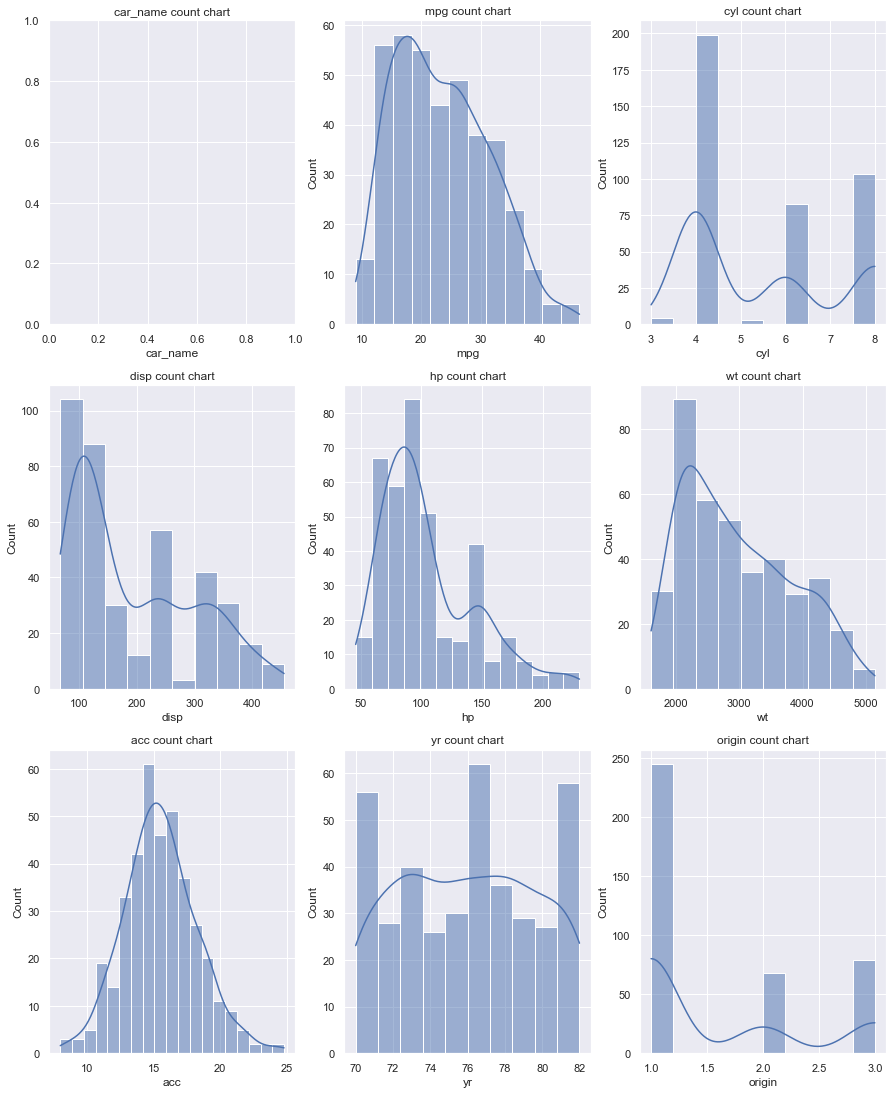

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

a = 3  # number of rows
b = 3  # number of columns
c=1

fig = plt.figure(figsize=(15,19))

for i in df4.columns:
    
    plt.subplot(a, b, c)
    plt.title('{} count chart'.format(i))
    plt.xlabel(i)
    if(i!='car_name'):
        sns.histplot(data=df4[i],kde=True);           
    c=c+1

- acc is distributed pretty normally
- cyl is tri modal in nature - **we might need a minimum 3 clusters later**
- 1 as the origin is the most common entry in the origin feature
- disp, hp, wt and mpg features are a little bit skewed

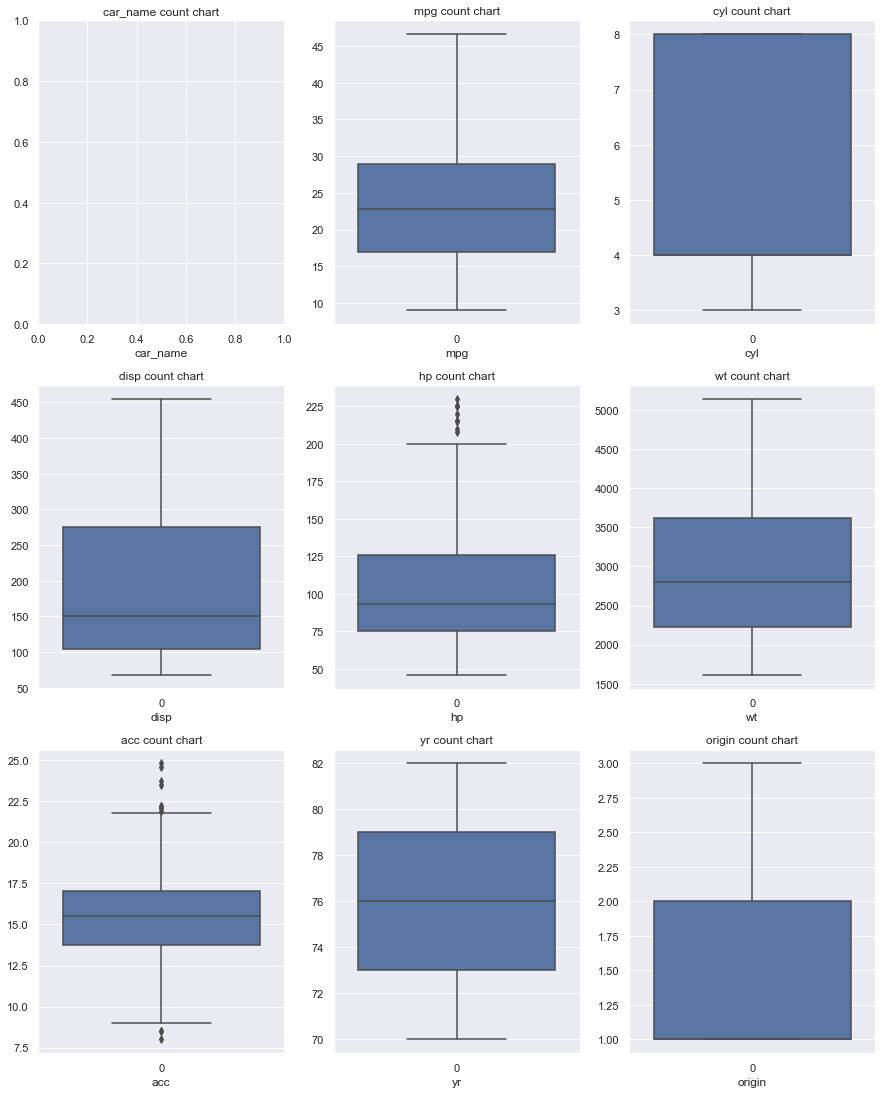

In [16]:
a = 3  # number of rows
b = 3  # number of columns
c=1

fig = plt.figure(figsize=(15,19))

for i in df4.columns:
    
    plt.subplot(a, b, c)
    plt.title('{} count chart'.format(i))
    plt.xlabel(i)
    if(i!='car_name'):
        sns.boxplot(data=df4[i]);           
    c=c+1

- As evaluated earlier, outliers are observed in the acc and the hp columns
- No other features posses outliers

#### 3.2 Bivariate and multivariate

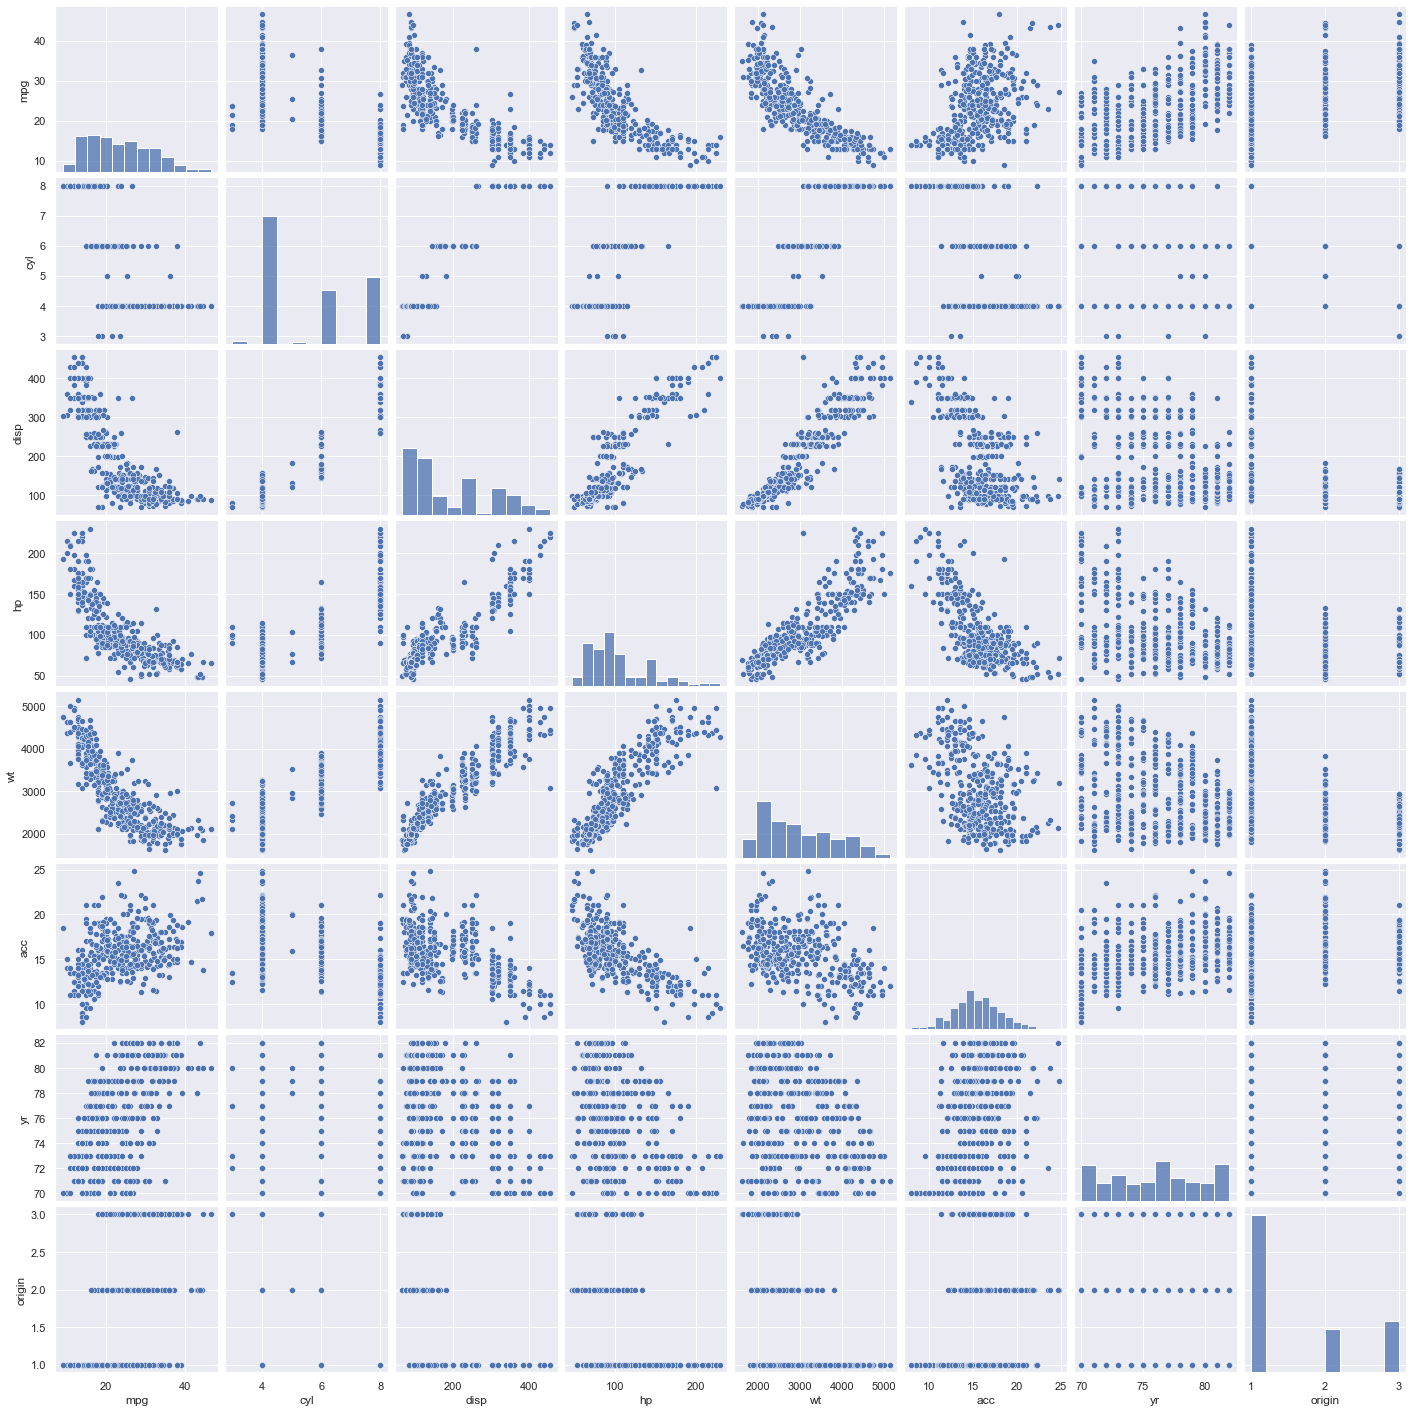

In [17]:
sns.set(rc = {'figure.figsize':(14,20)})
sns.pairplot(data = df4);

- Disp, hp and weight have a negative correlation with mpg, unlike with acc (positive correaltion)
- hp, wt have a negative correlation with disp and positive with acc
- wt vs disp and wt vs hp are positive correlation (quite inuitive!)

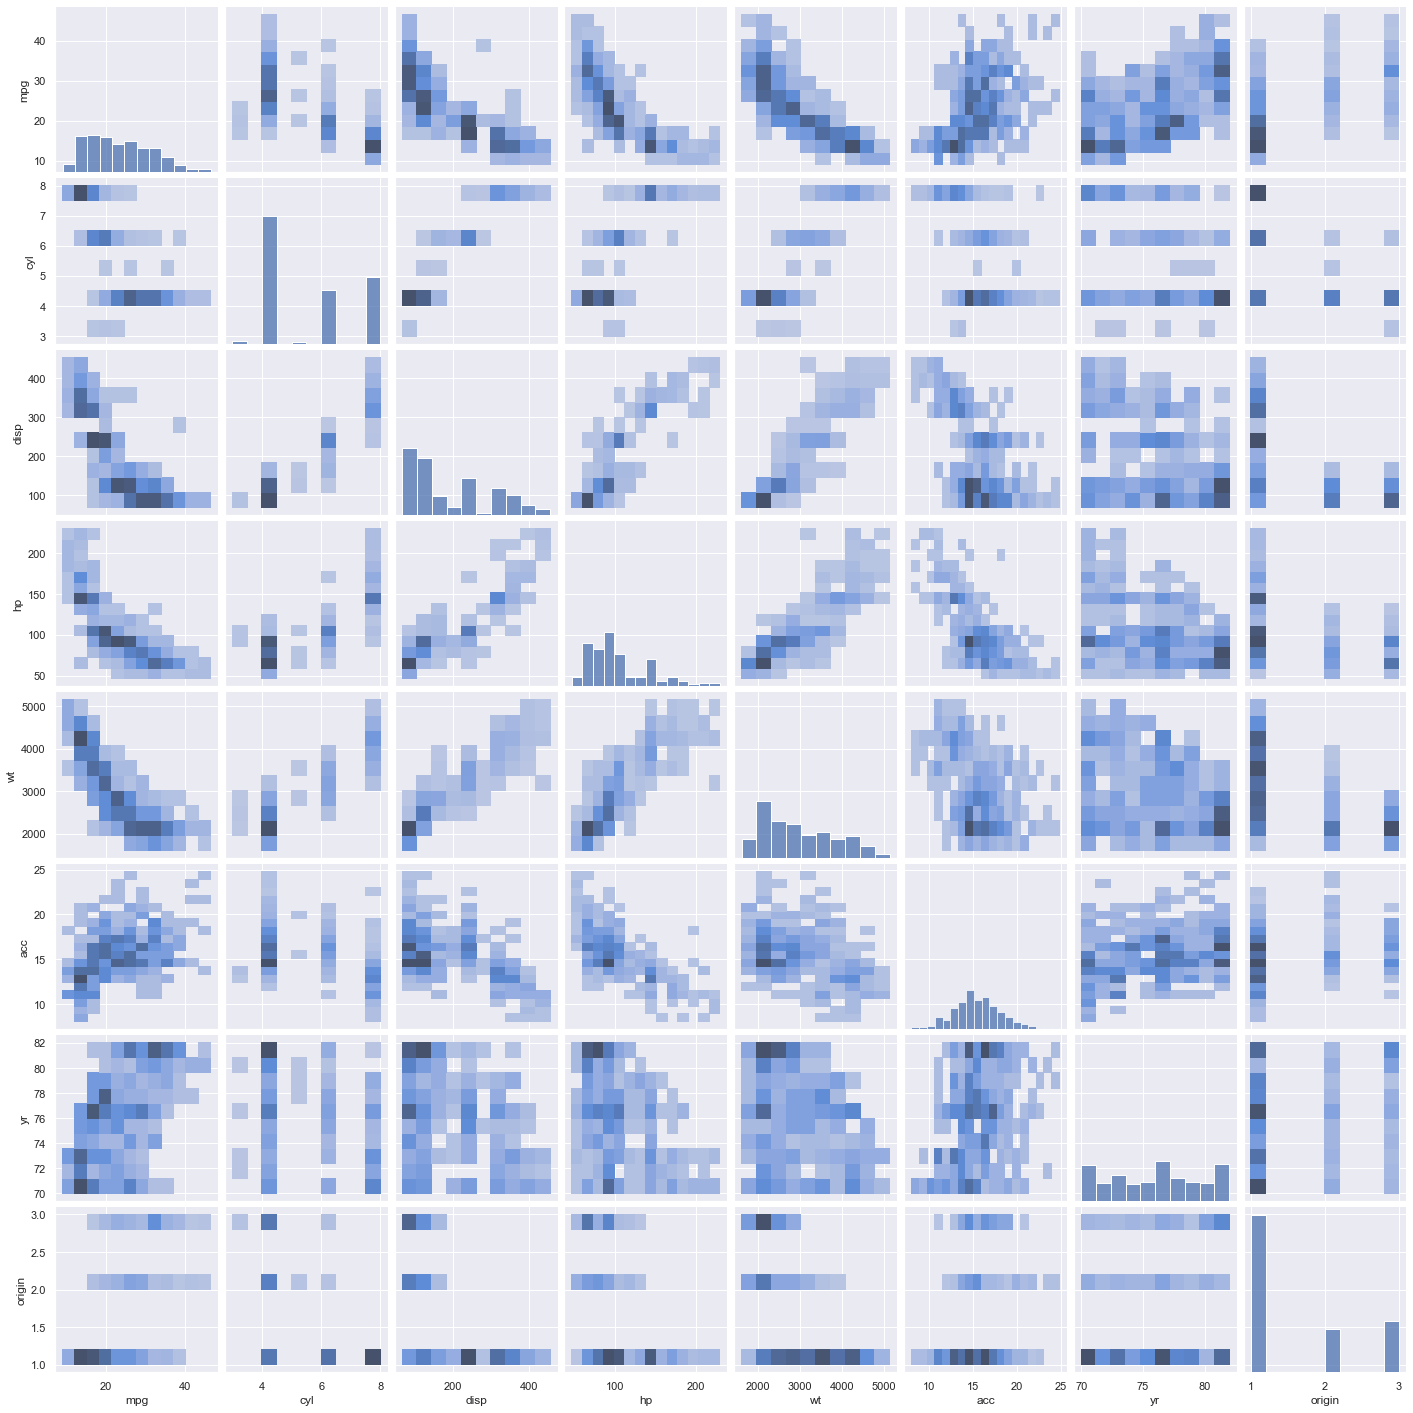

In [18]:
sns.pairplot(data = df4,kind="hist");

- cars with origin 0 tend to have lower mpg
- 4 cylinders is the most commom within the dataset

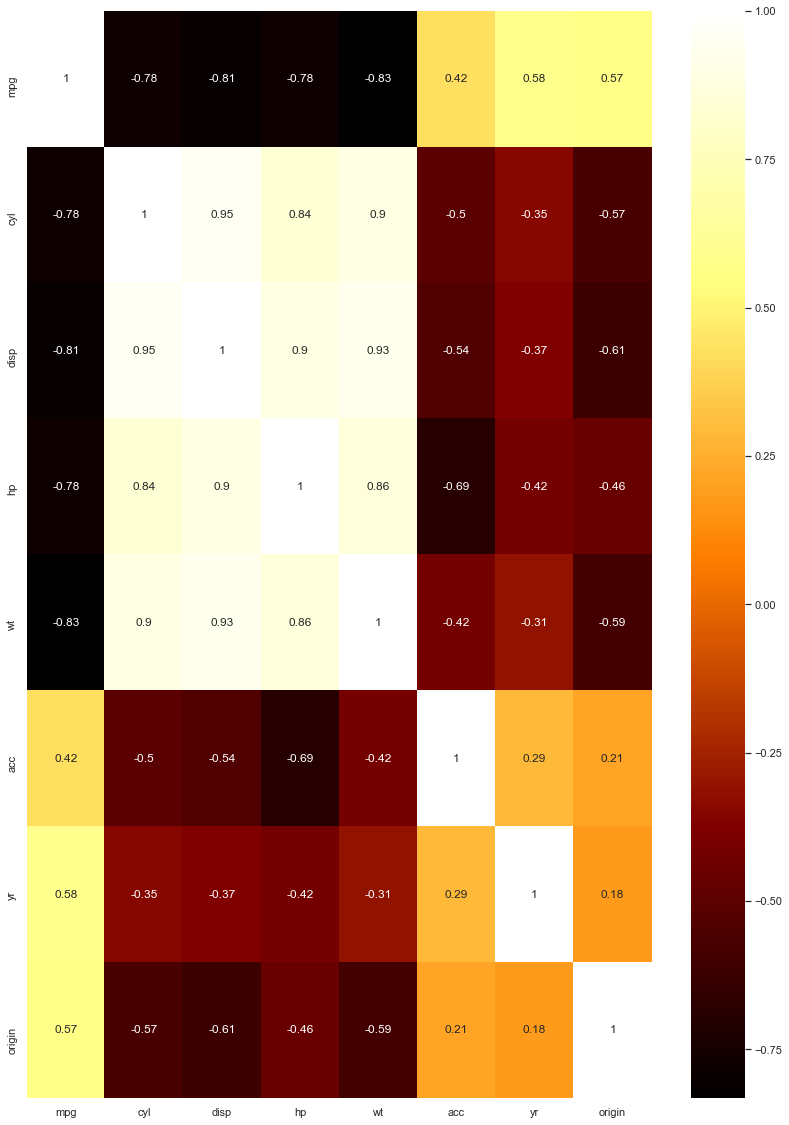

In [19]:
sns.heatmap(data = df4.corr(),annot=True,cmap ='afmhot');

- cyl, disp, hp and wt as a subset with repsect to each other have very high correlatio
- disp vs cyl has the highest positive correlation
- mpg vs wt has the lowest correlation

### 4. Model pre processing

In [20]:
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore

df_feature = df4.drop("car_name",axis=1)
df_fs = df_feature.apply(zscore)
df_fs

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641
...,...,...,...,...,...,...,...,...
387,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,-0.716641
388,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,0.526382
389,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,-0.716641
390,0.584228,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410,-0.716641


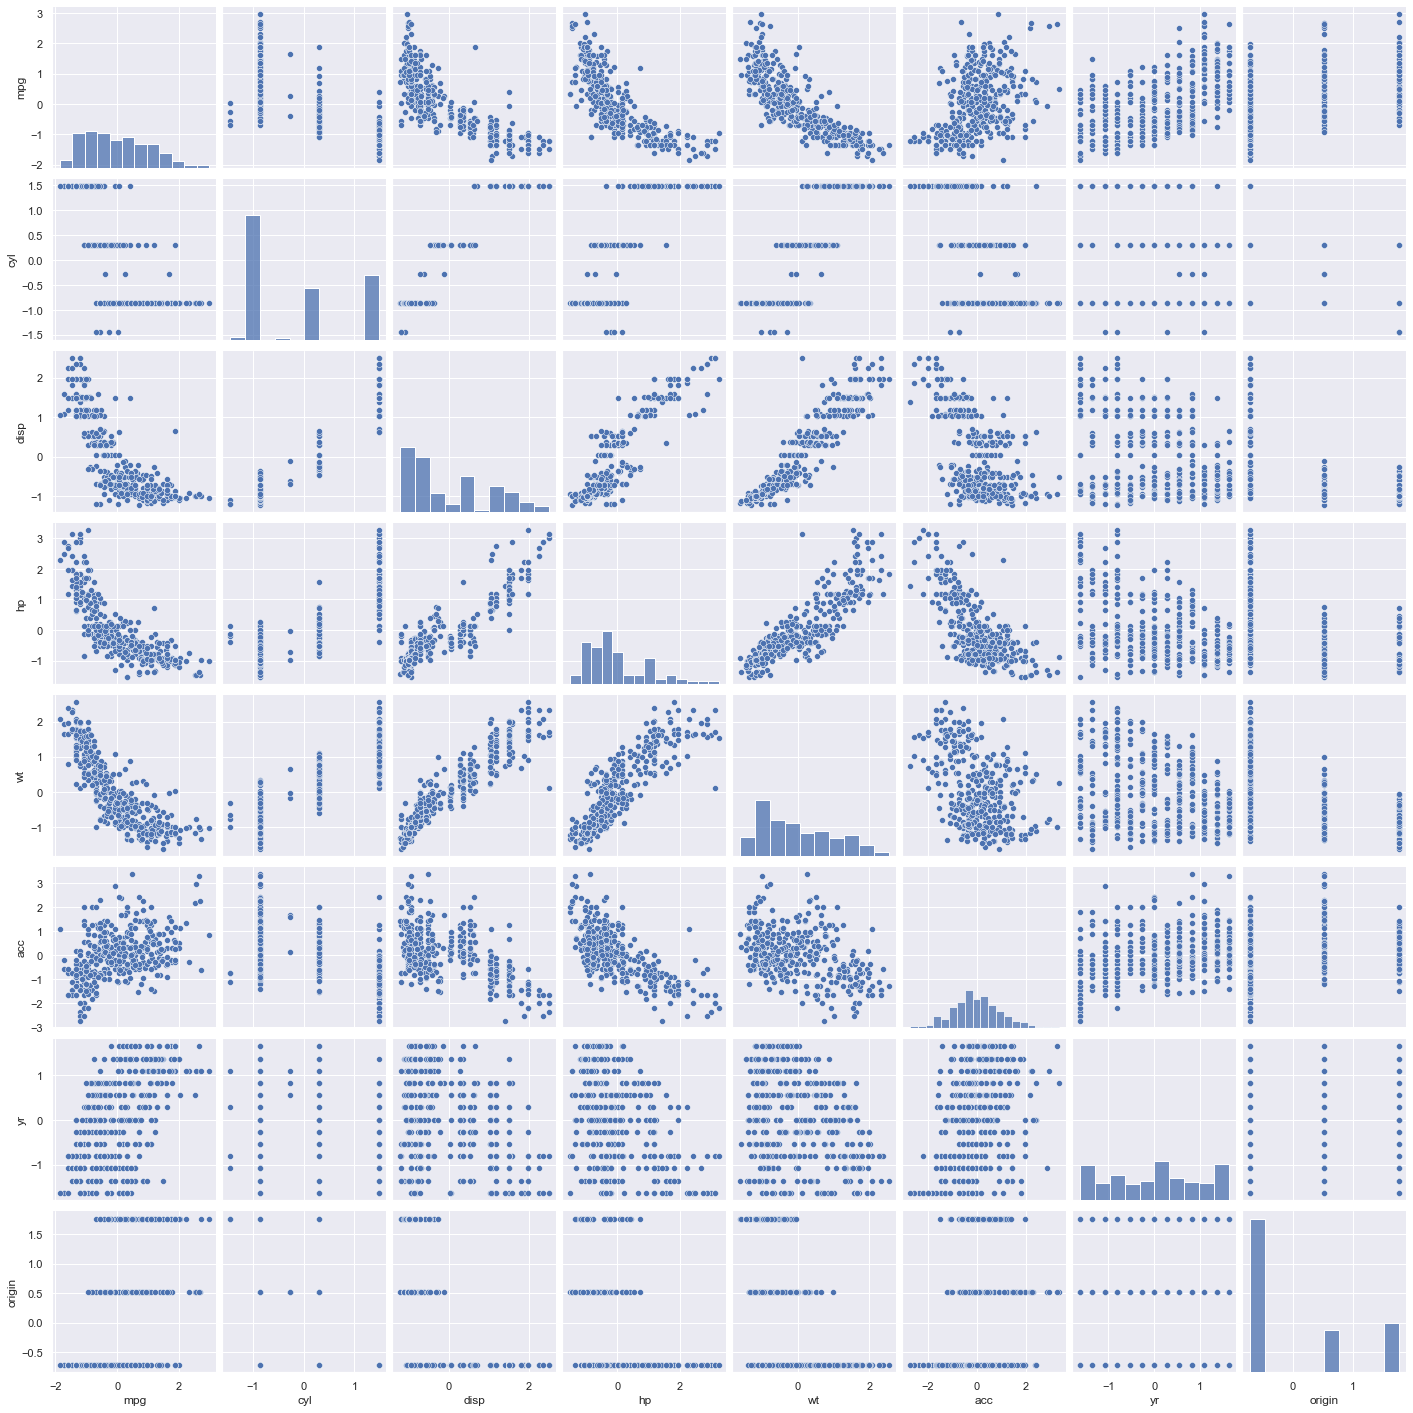

In [21]:
sns.pairplot(df_fs)

- The scaled data fits well with the observations from the original dataframe

### 5. K-means clustering

C:\Users\Harsh Pundhir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

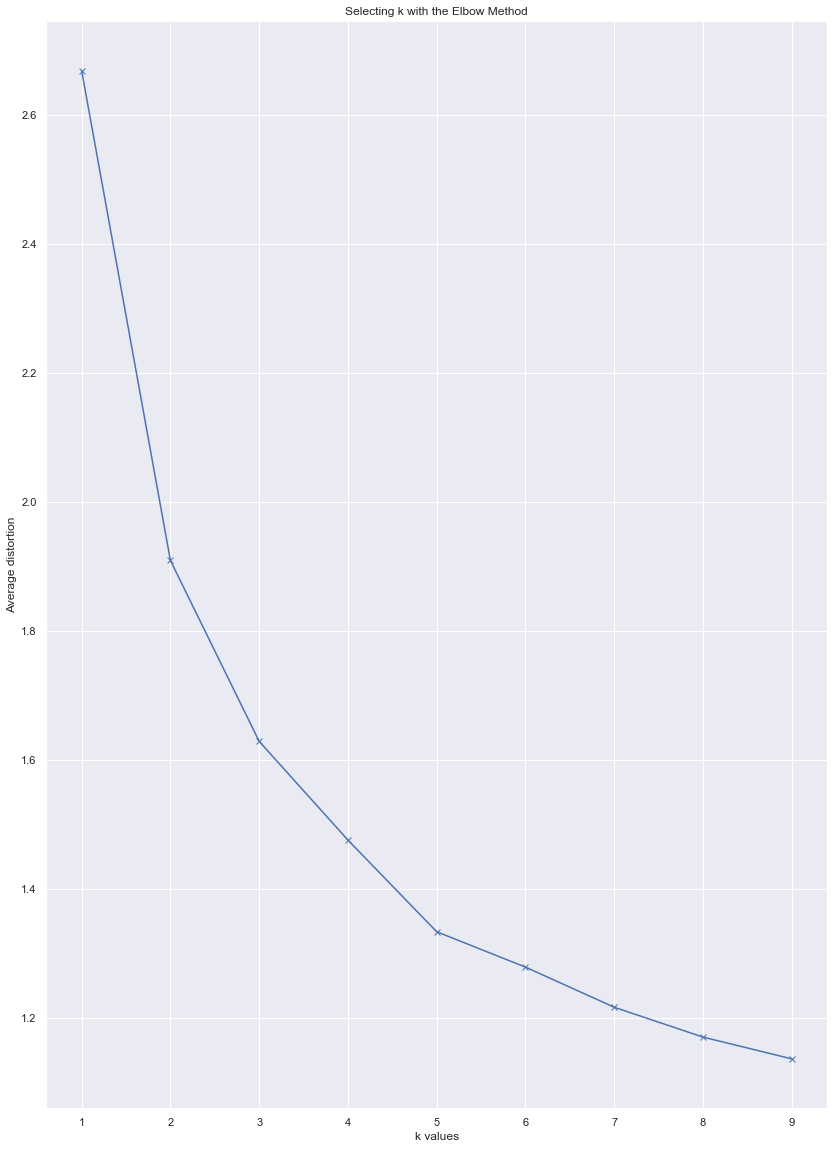

In [22]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_fs)
    prediction=model.predict(df_fs)
    meanDistortions.append(sum(np.min(cdist(df_fs, model.cluster_centers_, 'euclidean'), axis=1)) / df_fs.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k values')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


- Using the elbow method **k = 3 and k = 5** appear to capture good amount of information.  

In [25]:
# with K = 3

from sklearn.metrics import silhouette_score as sis

modelk3=KMeans(3)
modelk3.fit(df_fs)
prediction3=modelk3.predict(df_fs)
print('Silhouette Score:',{sis(df_fs, prediction3)})
    



Silhouette Score: {0.3245045951380211}


- Silhouette score is not so great, but at least it is positive !!!

In [29]:
df_fs3 = df_fs.copy()
df_feature3 = df_feature.copy()
df_fs3['Group'] = prediction3
df_feature3['Group'] = prediction3
df_feature3.tail()

,mpg,cyl,disp,hp,wt,acc,yr,origin,Group
387,27.0,4,140.0,86,2790,15.6,82,1,2
388,44.0,4,97.0,52,2130,24.6,82,2,0
389,32.0,4,135.0,84,2295,11.6,82,1,0
390,28.0,4,120.0,79,2625,18.6,82,1,2
391,31.0,4,119.0,82,2720,19.4,82,1,2


In [53]:
df_feature3g = df_feature3.groupby(['Group'])
df_feature3g.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
Group,,,,,,,,
0,30.437736,4.069182,103.559748,77.169811,2236.698113,16.308805,77.113208,2.345912
1,14.715000,7.980000,346.370000,160.550000,4126.910000,12.721000,73.750000,1.000000
2,21.651880,5.263158,188.770677,94.939850,2999.150376,16.744361,76.300752,1.090226


- Large difference in mean values of mpg, hp and wt features.
- Hence, the groups are different based on feature information.

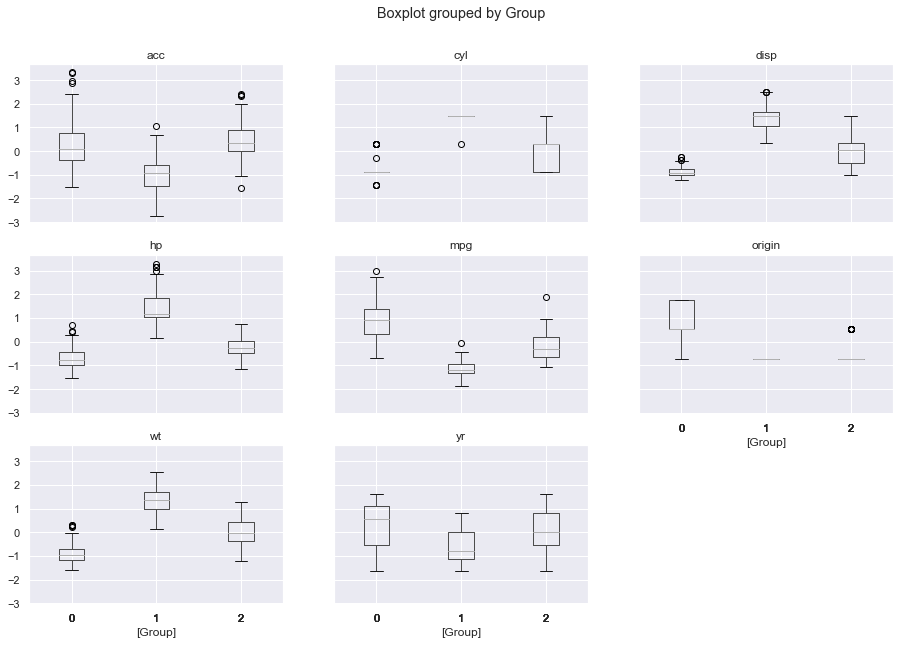

In [35]:
df_fs3.boxplot(by='Group', layout = (3,3),figsize=(15,10));

- The groups appear quite distinctive for k=3.

In [36]:
modelk5=KMeans(5)
modelk5.fit(df_fs)
prediction5=modelk5.predict(df_fs)
print('Silhouette Score:',{sis(df_fs, prediction5)})

Silhouette Score: {0.3339214769609638}


- Little higher score as that of the K=3 and still positive.

In [37]:
df_fs5 = df_fs.copy()
df_feature5 = df_feature.copy()
df_fs5['Group'] = prediction5
df_feature5['Group'] = prediction5
df_feature5.tail()

,mpg,cyl,disp,hp,wt,acc,yr,origin,Group
387,27.0,4,140.0,86,2790,15.6,82,1,0
388,44.0,4,97.0,52,2130,24.6,82,2,2
389,32.0,4,135.0,84,2295,11.6,82,1,0
390,28.0,4,120.0,79,2625,18.6,82,1,0
391,31.0,4,119.0,82,2720,19.4,82,1,0


In [54]:
df_feature5g = df_feature5.groupby(['Group'])
df_feature5g.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
Group,,,,,,,,
0,28.960000,4.200000,132.169231,82.538462,2551.307692,16.523077,79.630769,1.076923
1,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,1.000000
2,34.035714,4.085714,99.728571,72.285714,2158.057143,16.740000,79.385714,2.785714
3,19.081250,6.225000,233.862500,101.987500,3303.875000,16.627500,75.725000,1.037500
4,24.614458,4.048193,108.728916,85.578313,2351.253012,16.072289,73.337349,2.120482


- Large difference in mpg and disp. 
- The features are quite distinct.

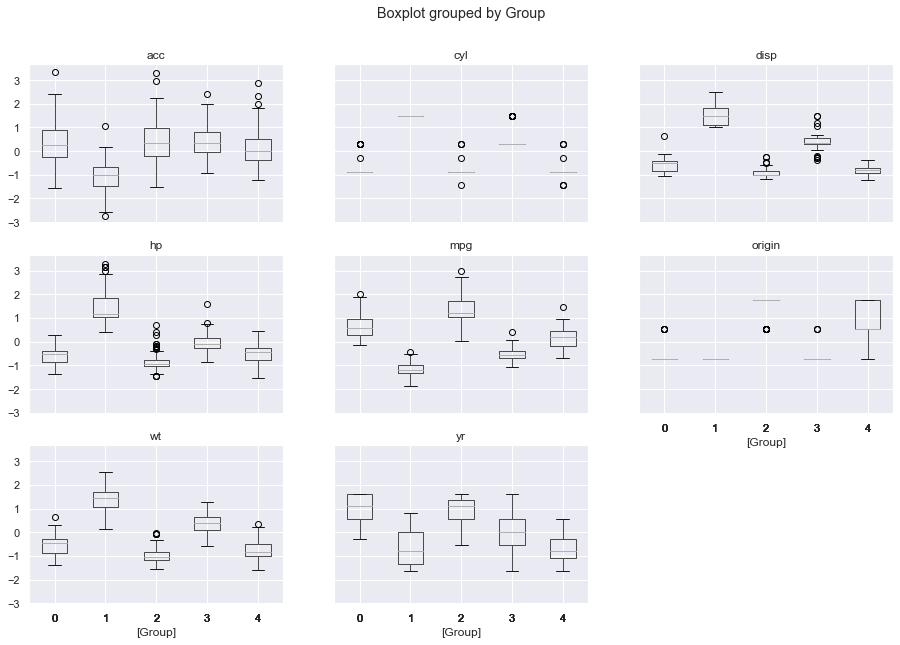

In [38]:
df_fs5.boxplot(by='Group', layout = (3,3),figsize=(15,10));

- The plots are different for the groups.

### 6. Hierarchial Clustering

In [49]:
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, linkage
from scipy.spatial.distance import pdist 

# For k=3 

modelh3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
modelh3.fit(df_fs)
df_fsh3 = df_fs.copy()
df_featureh3 = df_feature.copy()
df_fsh3['Group'] = modelh3.labels_
df_featureh3['Group'] = modelh3.labels_
df_featureh3.head(20)

,mpg,cyl,disp,hp,wt,acc,yr,origin,Group
0,18.0,8,307.0,130,3504,12.0,70,1,2
1,15.0,8,350.0,165,3693,11.5,70,1,2
2,18.0,8,318.0,150,3436,11.0,70,1,2
3,16.0,8,304.0,150,3433,12.0,70,1,2
4,17.0,8,302.0,140,3449,10.5,70,1,2
5,15.0,8,429.0,198,4341,10.0,70,1,2
6,14.0,8,454.0,220,4354,9.0,70,1,2
7,14.0,8,440.0,215,4312,8.5,70,1,2
8,14.0,8,455.0,225,4425,10.0,70,1,2
9,15.0,8,390.0,190,3850,8.5,70,1,2


In [51]:
Z = linkage(df_fsh3, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_fs))
print(c)

0.6982104845991662


- Cophentic coefficient for n_clusters=3 is high in magnitude, hence n_clusters=3 offers good clustering (little higher than n_clusters=5 done below)

In [50]:
# For k=5

modelh5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='average')
modelh5.fit(df_fs)
df_fsh5 = df_fs.copy()
df_featureh5 = df_feature.copy()
df_fsh5['Group'] = modelh5.labels_
df_featureh5['Group'] = modelh5.labels_
df_featureh5.head(20)

,mpg,cyl,disp,hp,wt,acc,yr,origin,Group
0,18.0,8,307.0,130,3504,12.0,70,1,2
1,15.0,8,350.0,165,3693,11.5,70,1,2
2,18.0,8,318.0,150,3436,11.0,70,1,2
3,16.0,8,304.0,150,3433,12.0,70,1,2
4,17.0,8,302.0,140,3449,10.5,70,1,2
5,15.0,8,429.0,198,4341,10.0,70,1,2
6,14.0,8,454.0,220,4354,9.0,70,1,2
7,14.0,8,440.0,215,4312,8.5,70,1,2
8,14.0,8,455.0,225,4425,10.0,70,1,2
9,15.0,8,390.0,190,3850,8.5,70,1,2


In [52]:
Z = linkage(df_fsh5, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_fs))
print(c)

0.6960494316913621


- Cophentic coefficient for n_clusters=5 is good, hence n_clusters=5 offers good clustering as well. 

### 7. Differences observed in K-means and Hierarchial clustering

|                   K- Means                   |             Hierarchial            |
|:--------------------------------------------:|:----------------------------------:|
| K needs to be fixed (3,5 here)               | Selection can be made by dendorams |
| Values changed upon rerun (mean for group 0) | Values remain constant after rerun |
| Took less time to run                        | Ran faster (in my case)            |

#### 7.1 K means and Hierarchial clustering summary

- optimal K or n_clusters using the elbow method came out as 3 and 5
- Shilouette values of both k = 3 and k = 5 were found to be highly similar (~0.3)
- The mean values during the grouping offered more information for k = 5 than k = 3.
- The cophnetic coefficient value for k = 3 and k = 5 in Hierarchial clustering were almost the same (~0.7)
- K as 5 captures more information according to the elbow plot.
- Therefore, k = 5 as the number of clusters can be chosen for optimum clustering, unless business has specific demands.

#### 7.2 Why k  = 3 seems reasonable.

- k as 5 captures more information as depicted by the elbow plot.
- The mean mpg values differed significantly for the mpg feature (34, 28, 24, 19 and 14).
- Similarly during grouping for k = 5, distinctly apart values can be observed for cyl,hp and wt features

In [63]:
df_fs50 = df_fs5[(df_fs5['Group']==0)]
df_fs50

,mpg,cyl,disp,hp,wt,acc,yr,origin,Group
166,-0.057205,-0.864014,-0.520637,-0.558487,-0.399124,0.529398,-0.266263,-0.716641,0
168,-0.057205,-0.864014,-0.520637,-0.688553,-0.454528,1.073795,-0.266263,-0.716641,0
182,0.199368,-0.864014,-0.520637,-0.324369,-0.478104,-0.232757,0.005547,-0.716641,0
183,0.327654,-0.864014,-0.922511,-0.662540,-0.851784,0.783450,0.005547,-0.716641,0
193,0.712514,-0.864014,-1.046900,-1.364896,-1.111121,2.416641,0.005547,-0.716641,0
...,...,...,...,...,...,...,...,...,...
386,0.455941,-0.864014,-0.415384,-0.376395,-0.032516,0.638278,1.636410,-0.716641,0
387,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,-0.716641,0
389,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,-0.716641,0
390,0.584228,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410,-0.716641,0


### 8. Linear Regression coefficients on separate clusters for K = 5

In [67]:
from sklearn.linear_model import LinearRegression

intercept=[]
coef=[]

for i in range(0,5):
    df_fs_temp = df_fs5[(df_fs5['Group']==i)]

    mlr = LinearRegression()

    # fit linear regression
    mlr.fit(df_fs_temp.iloc[:,1:],df_fs_temp['mpg'])

    # get the slope and intercept of the line best fit.
    intercept.append(mlr.intercept_)


    coef.append(mlr.coef_)

In [84]:
print('_______________Intercepts__________________\n')
for i in range(0,5):
    print("for k = ",i+1," Intercept = ",intercept[i])

_______________Intercepts__________________

for k =  1  Intercept =  0.30147511695716256
for k =  2  Intercept =  -0.1699686041739521
for k =  3  Intercept =  0.7338225499361499
for k =  4  Intercept =  -0.6624077781802535
for k =  5  Intercept =  -0.5285288301063407


- The clusters differ a lot as seen by the values above in their intercept values, hence each cluster is unique

In [83]:
print('__________________Coefficients___________________\n')
for i in range(0,5):
    print("k=",i+1,"\nCoefficients = ",coef[i])
    print("\n")

__________________Coefficients___________________

k= 1 
Coefficients =  [ 0.03985041  0.84603921 -0.57930542 -1.27290978 -0.08623982  0.44267298
  0.70719178  0.        ]


k= 2 
Coefficients =  [-0.5141016  -0.07563882 -0.09381686 -0.11975106 -0.18356236  0.18087378
 -0.1713672   0.        ]


k= 3 
Coefficients =  [ 0.26835215  0.13830591 -0.49592071 -0.39980596  0.18075519  0.45677007
 -0.22260004  0.        ]


k= 4 
Coefficients =  [ 0.24862628 -0.03606548 -0.05279696 -0.37151891 -0.00612757  0.15275109
 -0.2368054   0.        ]


k= 5 
Coefficients =  [ 0.33193366 -0.57372651 -0.25386093 -0.54993938 -0.11373679  0.0238849
 -0.00922986  0.        ]




- The coefficients vectors for different clusters are very different both in magnitude and signs.

### 9. Advantages of using different models for different clusters

- Increased performance
- If adequate number of clusters are constructed, performance metrics will score better
- Reduced computation time and power
- Clustering offers intuition and easy feature anticipation for new entries.
- Various clusters can be equipped with various models (ex: For binary clustering, Linear Regression for group 1 and SVM for group 2)
- Excessive clustering might lead to overfit models, hence should be avoided

## 10. Suggestions:

### 1. Quantity

- More data can be loaded from various sources within the company so that more information can be captured
- If necessary source of the source can be increased - Marketing, campaigns, human traffic, surveys, etc. **(increasing the number of cars)**
- Based on the output demand, if needed extra features can be adding, thus increasing the quantity of the entire dataset

### 2. Quality
- The data must come from a trustworthy source. **(especially target variable like mpg,hp and disp)**
- Any approximation should be mentioned while handling the data to the model building team.
- The data initially can have parmeters like probability and confidence intervals.
- Lot of missing values / null values should be avoided at the collection source

### 3. Variety
- meta data from varoius sources should be consistent
- Semi-Structured and unstrcutured data must be carefully logged, as it is hard to deal with
- the column definitions must be clear with respect to the business context, so the analyst does not interpret it as something else
- Complex unstructured data can be avoided if not necessary

### 4. Velocity
- Real time trustworthy data collection.
- If need be, at the root level re-definition of few parameters must be possible.
- data quality assesment can be done to make the data better.
- Proper initial sampling can be performed every time a data entry takes place.

           ------------------------------------------- END --------------------------------------------------------